# Portfolio 2

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)
import warnings; warnings.simplefilter('ignore')
from datetime import date


In [2]:
data = pd.read_csv('data/energydata_complete.csv')
data.date=pd.to_datetime(data.date)
data.index=data.date
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Text(0.5, 1.0, 'Appliances energy consumption measurement for the whole period')

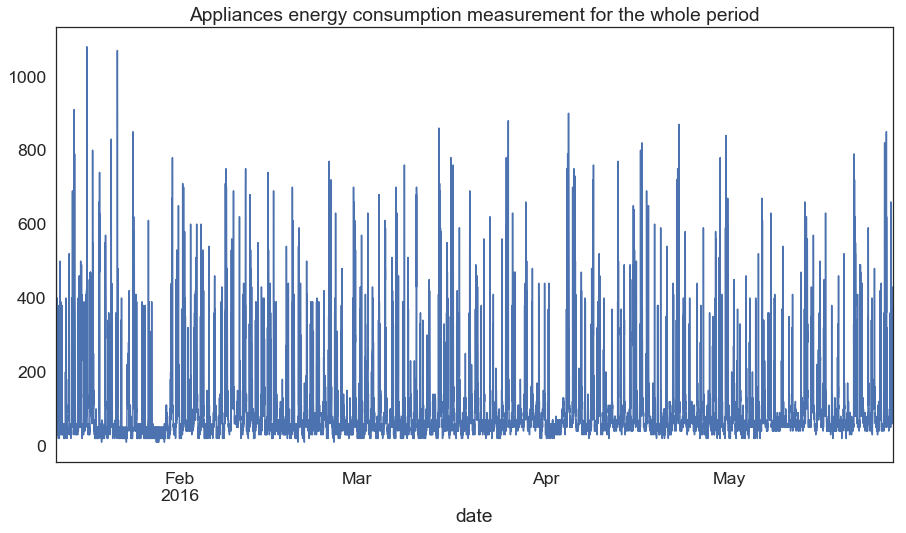

In [68]:
#Plotting Figure.
plt.figure(figsize=(15,8))
data['Appliances'].plot()
plt.title("Appliances energy consumption measurement for the whole period")

#ticklabels = data.date.strftime('%Y-%m-%d')


Text(0.5, 1.0, 'A closer look at the ﬁrst week of data')

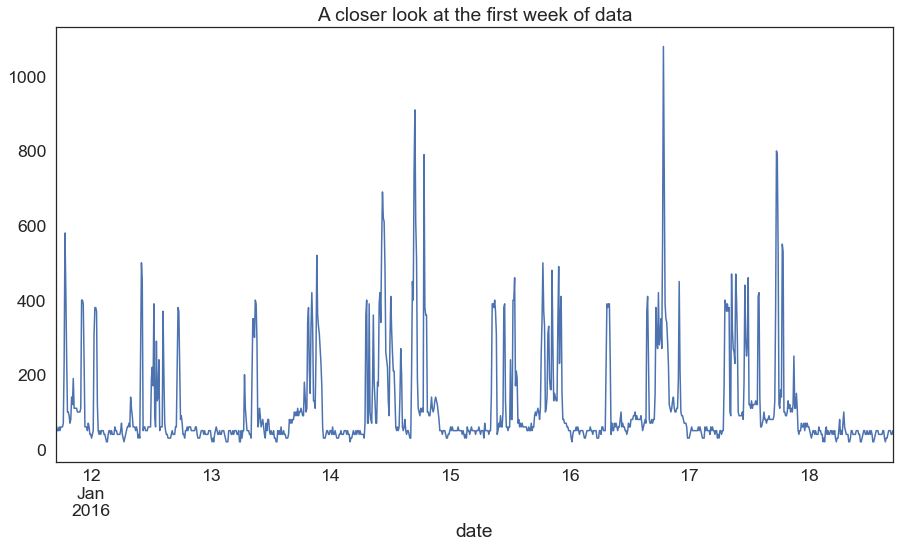

In [69]:
data['Appliances'][0:1008].plot()
plt.title("A closer look at the ﬁrst week of data")

Text(0.5, 1.0, 'Appliances energy consumption distribution')

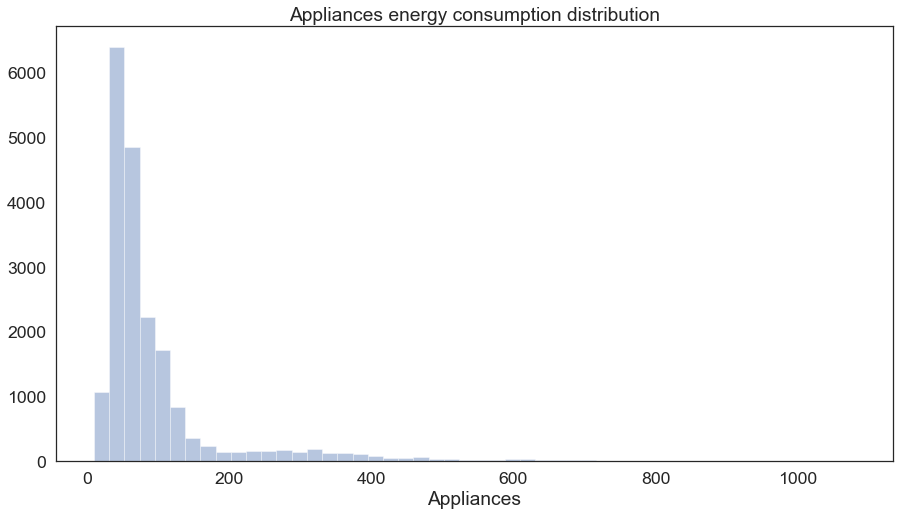

In [76]:
sns.distplot(data.Appliances,kde=False)
plt.title("Appliances energy consumption distribution : Histogram")

Text(0.5, 1.0, 'Appliances energy consumption distribution : Boxplot')

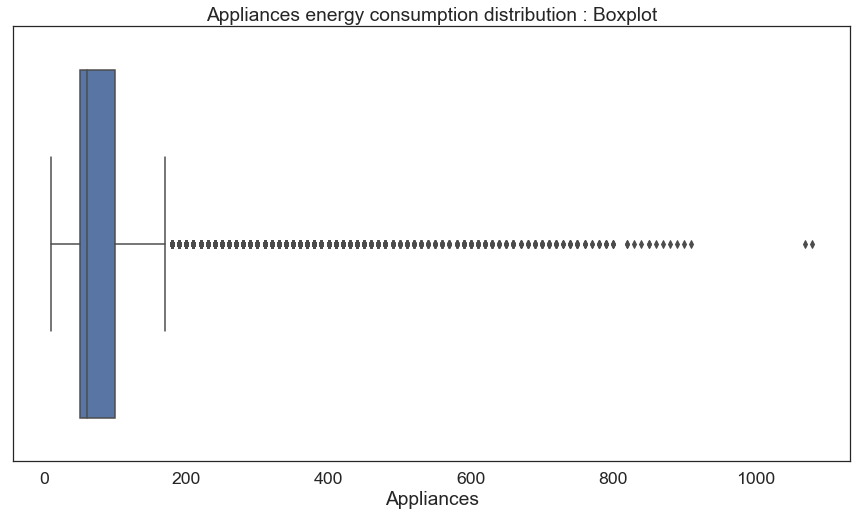

In [78]:
sns.boxplot(data.Appliances)
plt.title("Appliances energy consumption distribution : Boxplot")

Text(0.5, 0.98, 'Relationship between the energy consumption of appliances with: lights, T1, RH1, T2, RH2, T3, RH3,T1 and RH1 correspond To the kitchen conditions;  T2 and RH2 correspond to the living room conditions')

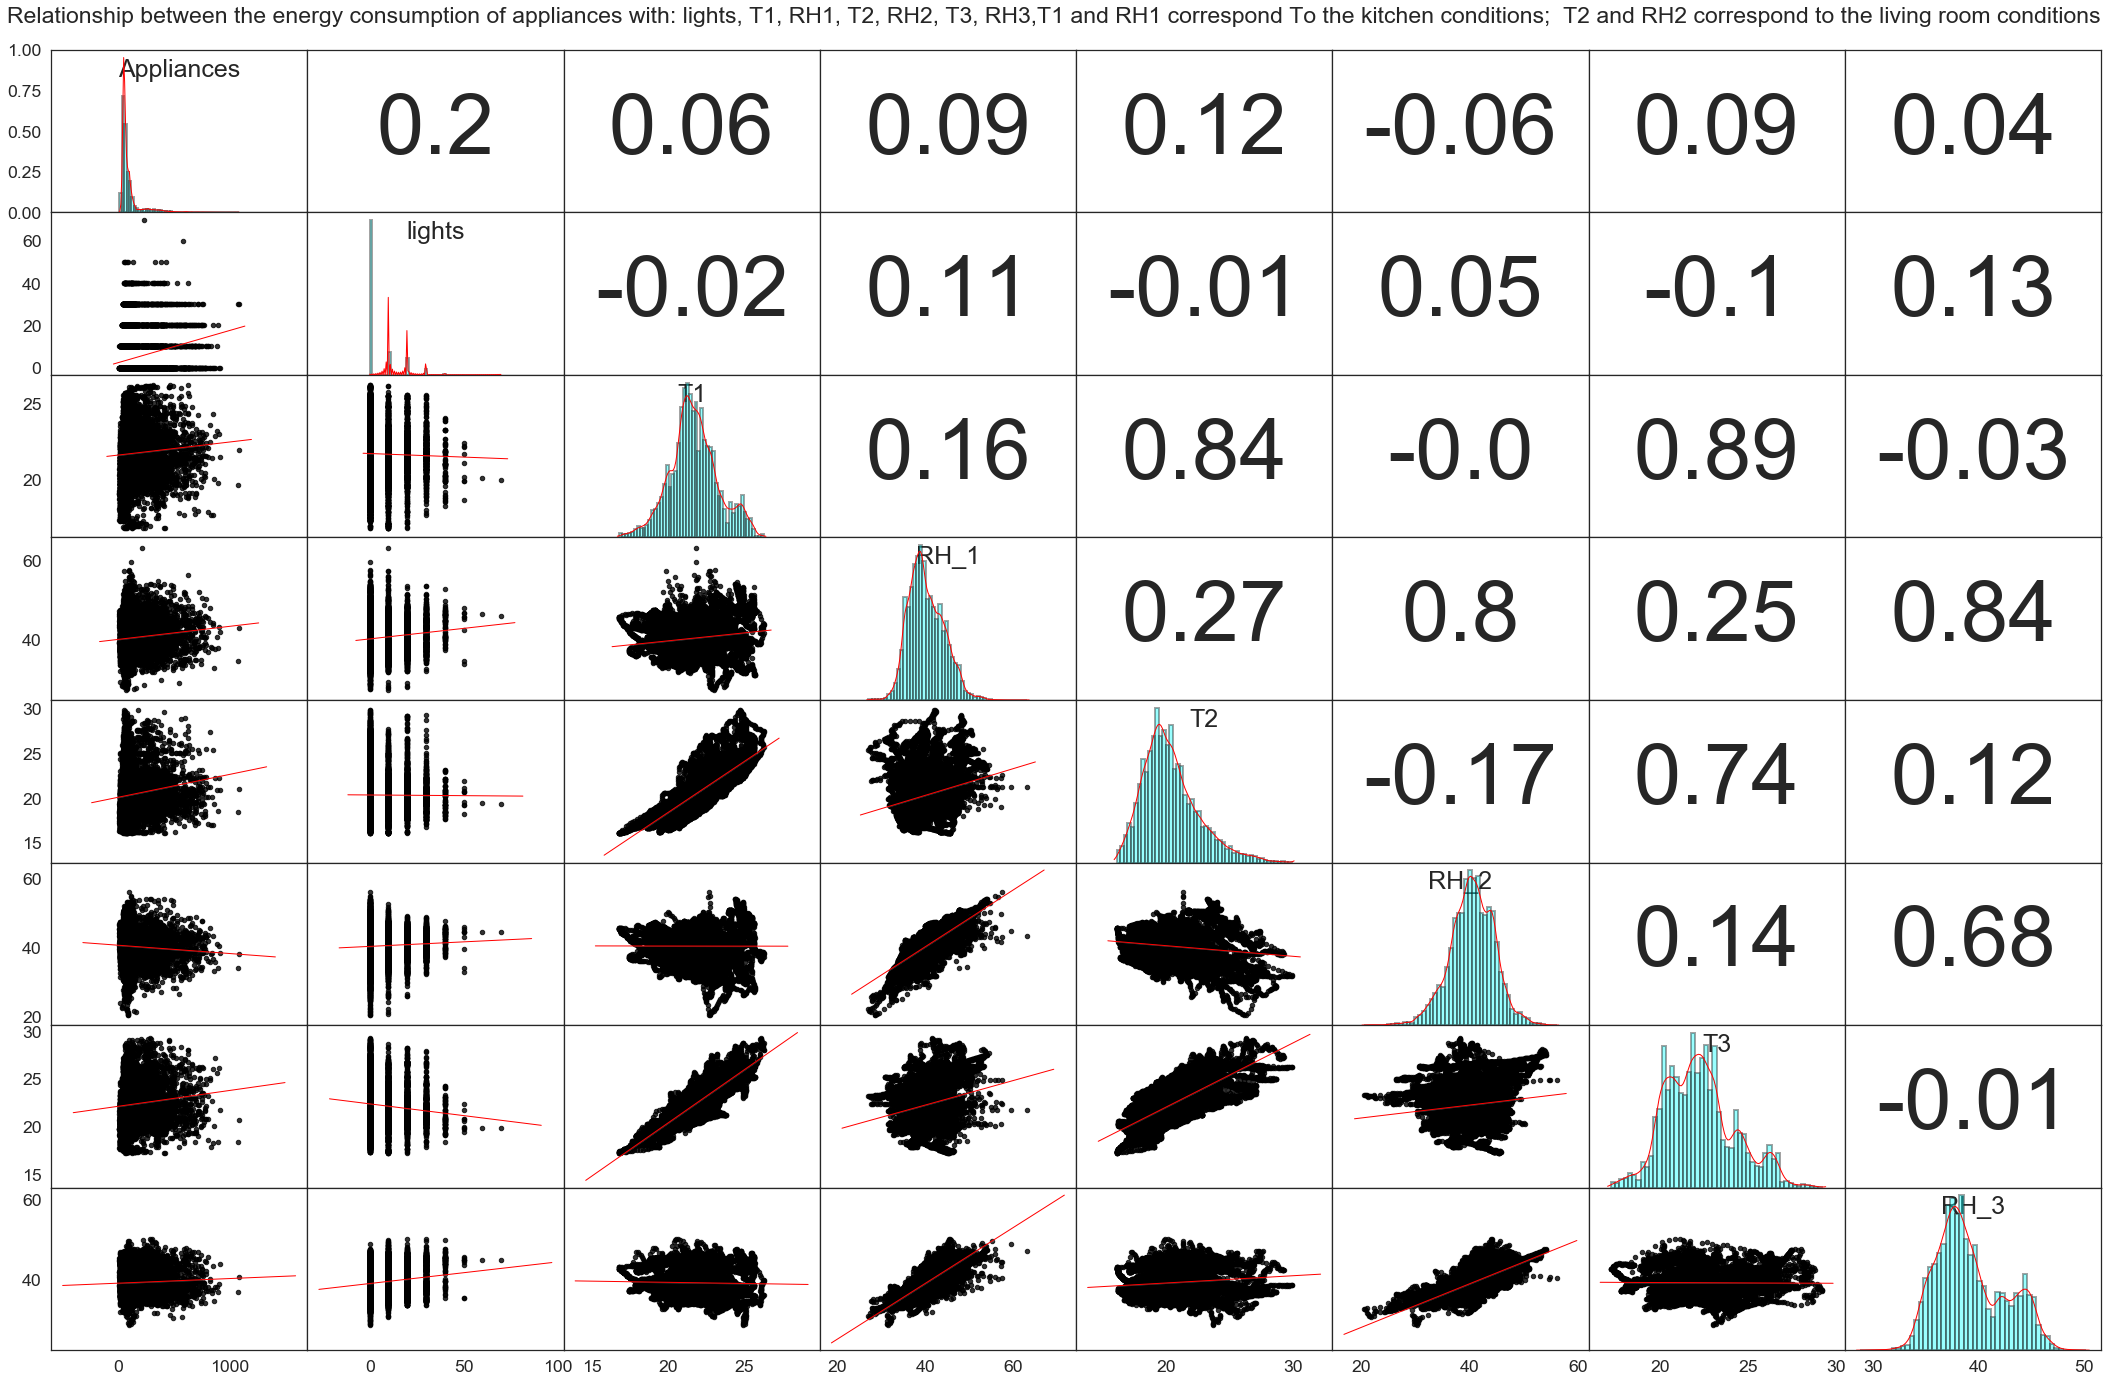

In [89]:
temp1 = data[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3','RH_3']]

from scipy import stats
import seaborn as sns
import numpy as np
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = 85
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)


sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(temp1, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, fit_reg=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='cyan',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'cyan'})

g.map_upper(corrdot)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), temp1.columns):
    ax.annotate(col, [.5, .95],  xycoords="axes fraction",
                ha='center', va='top', fontsize=25)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Relationship between the energy consumption of appliances with: lights, T1, RH1, T2, RH2, T3, RH3,T1 and RH1 correspond To the kitchen conditions;  T2 and RH2 correspond to the living room conditions")

Text(0.5, 0.98, 'Hourly energy consumption of appliances heat map for four consecutive weeks')

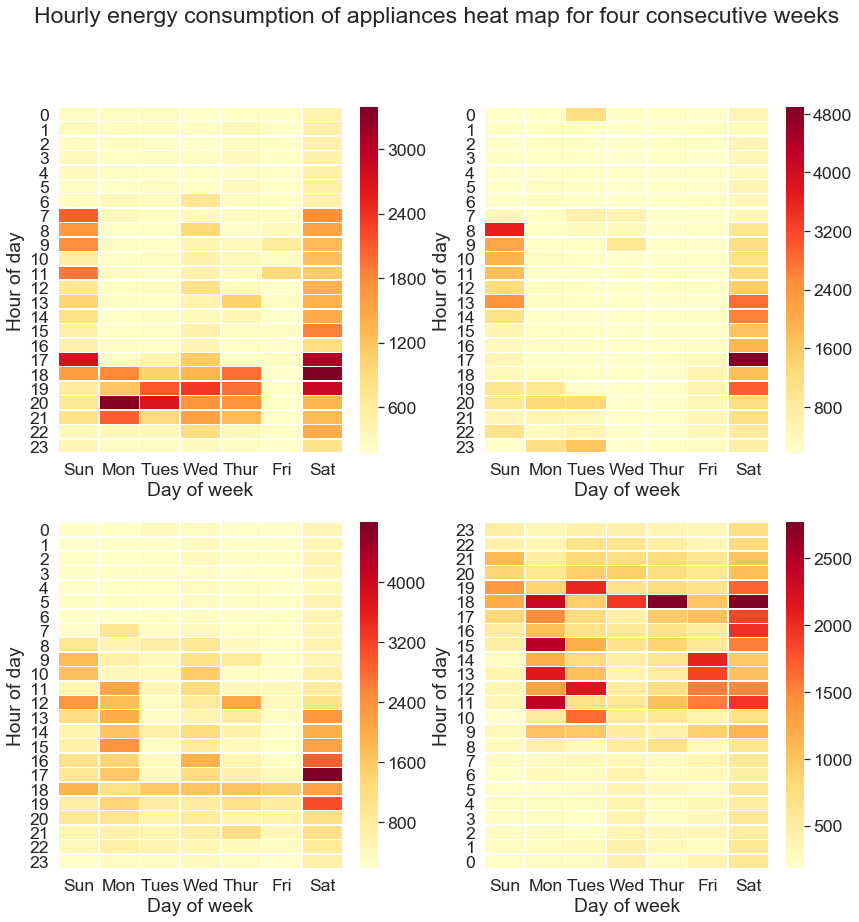

In [91]:
def get_week_data(a,b):
    data['day_of_week'] = data['date'].dt.weekday_name
    test=data.filter(['date','day_of_week','Appliances'],axis=1)
    #print(test.head())

    test=test[test.date<date(a[0],a[1],a[2])]
    test=test[test.date>date(b[0],b[1],b[2])]

 
    test['start_hour']=test['date'].dt.hour
    test=test.drop(['date'],axis=1)
    test.head()
    test1=pd.pivot_table(test[['day_of_week','start_hour','Appliances']],index=['day_of_week','start_hour'],aggfunc='sum')


    test2=test1.unstack(level=0)

    
    test2=test2.reindex_axis(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)
    return test2

week1 = get_week_data([2016,1,24],[2016,1,16])
week2 = get_week_data([2016,1,31],[2016,1,23])
week3 = get_week_data([2016,2,7],[2016,1,30])
week4 = get_week_data([2016,2,14],[2016,2,6])

hours=[]
for h in range(24):
    hours.append(h)
    
day_short_names=['Sun','Mon','Tues','Wed','Thur','Fri','Sat']

f, axes = plt.subplots(2,2, figsize=(14, 14))

sns.heatmap(week1,fmt='d',linewidths=.5,cmap="YlOrRd",xticklabels=day_short_names, yticklabels=hours,ax=axes[0,0])
sns.heatmap(week2,fmt='d',linewidths=.5,cmap="YlOrRd",xticklabels=day_short_names, yticklabels=hours,ax=axes[0,1])
sns.heatmap(week3,fmt='d',linewidths=.5,cmap="YlOrRd",xticklabels=day_short_names, yticklabels=hours,ax=axes[1,0])
sns.heatmap(week4,fmt='d',linewidths=.5,cmap="YlOrRd",xticklabels=day_short_names, yticklabels=hours,ax=axes[1,1])

plt.gca().invert_yaxis()
axes[0,0].set(xlabel='Day of week', ylabel='Hour of day')
axes[0,1].set(xlabel='Day of week', ylabel='Hour of day')
axes[1,0].set(xlabel='Day of week', ylabel='Hour of day')
axes[1,1].set(xlabel='Day of week', ylabel='Hour of day')

f.suptitle("Hourly energy consumption of appliances heat map for four consecutive weeks")


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from math import sqrt


model = LinearRegression()
X = data.drop(['Appliances','date','day_of_week'],axis=1)
y = data['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
model.fit(X_train,y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))
print (sqrt(mean_squared_error(y_test,y_pred)))


0.14643032890872876
98.09509660186464


In [67]:
#Here I am trying to get number of feature selected by RFE and the R2 score for those features.
# We will use this to plot graph ans see how many features need to be used for creating a better model
# Research paper uses RMSE, we are using R-squared values

from sklearn.feature_selection import RFE
g1 = []

feature_cols = np.array(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'])
estimator = LinearRegression()
for i in range(1,len(feature_cols)):
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, y_train)

    supp = selector.get_support()
    features_selected = feature_cols[supp]
    
    g1.append([len(features_selected),selector.score(X_train,y_train)])
    
    #print("Selected features:", feature_cols[supp])
    #print("Coeffs:", selector.estimator_.coef_)

Text(0, 0.5, 'The r-Squared values for the features')

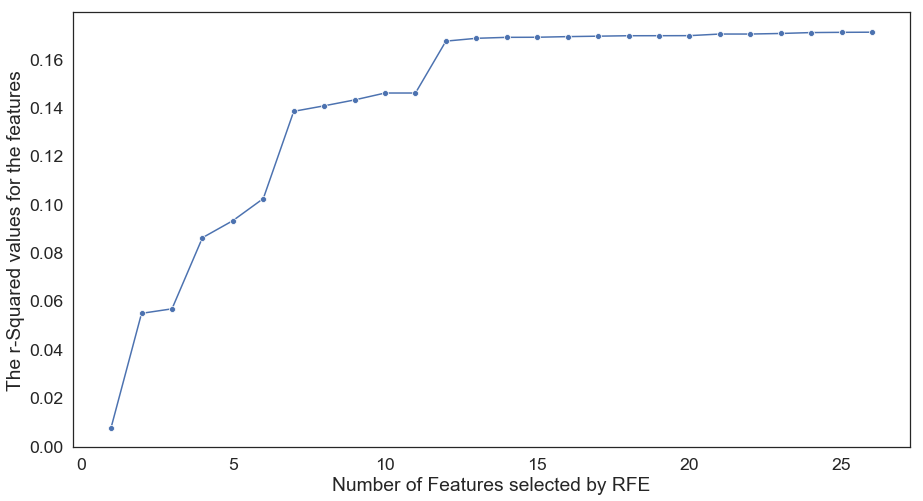

In [93]:
df1 = pd.DataFrame(g1)
sns.lineplot(x=0,y=1,data=df1,marker='o')
plt.xlabel("Number of Features selected by RFE")
plt.ylabel("The r-Squared values for the features")

Here we can see the model performs well when we you 27 features from the dataset . i.e. all the features.
The research paper has some other values, because they had added some custom features to the data like 'weekend','day of the week' etc.